In [26]:
import pandas as pd

orders = pd.read_csv('df.csv')

orders.head(10)

,OrderID,CustomerID,OrderDate,ExpectedDeliveryDate,ActualDeliveryDate,OrderStatus,ShippingMethod,ShippingCost_NGN,ShippingAddress,ShippingCity,ShippingState,ShippingPostalCode,ShippingCountry,PaymentMethod,PaymentStatus,DiscountCode,DiscountAmount_NGN,TotalAmount_NGN
0,ORD00001,C00167,2024-03-01,2024-03-02,2024-03-02,Returned,Standard Delivery (NG),3524.74,Suite 810 Seth Center,Port Harcourt,Rivers,880792.0,Nigeria,cash on delivery (ph only),Authorized,NaN,NaN,8383.72
1,ORD00002,C11600,2024-03-01,2024-03-04,NaN,Processing,Local Pickup (PH Only),0.00,Suite 605 Linda Street,Abuja,FCT,118699.0,Nigeria,PayPal,Paid,NaN,NaN,560861.34
2,ORD00003,C00451,2024-03-01,NaN,NaN,Cancelled,Standard Delivery (NG),3883.79,Apt. 280 Camacho Trail,Port Harcourt,Rivers,937077.0,Nigeria,Card (Paystack/Flutterwave),Pending Payment,NaN,NaN,1422829.73
3,ORD00004,C00244,2024-03-01,2024-03-08,2024-03-08,Delivered,Interstate Bus,4102.52,Suite 137 Williams Terrace,Port Harcourt,Rivers,306151.0,Nigeria,Cash on Delivery (PH Only),Refunded,NaN,NaN,50970.78
4,ORD00005,C00200,2024-03-01,NaN,NaN,Cancelled,Express (Lagos/PH/Abuja),5007.63,Suite 562 Koch Key,Port Harcourt,Rivers,968800.0,Nigeria,PayPal,Authorized,NaN,NaN,520088.24
5,ORD00006,C00089,2024-03-01,2024-03-07,NaN,Partiallyshipped,Local Pickup (PH Only),0.00,Apt. 397 Perez Mountains,Port Harcourt,Rivers,884868.0,Nigeria,USSD,Authorized,NaN,NaN,258097.30
6,ORD00007,C00089,2024-03-01,NaN,NaN,Cancelled,Local Pickup (PH Only),0.00,Suite 160 Carr Oval,Port Harcourt,Rivers,456154.0,Nigeria,Card (Paystack/Flutterwave),Refunded,NaN,NaN,433288.98
7,ORD00008,C00001,2024-03-01,2024-03-08,2024-03-08,Delivered,Interstate Bus,2294.28,Suite 763 Ramirez Cliffs,Port Harcourt,Rivers,973867.0,Nigeria,Bank Transfer,Pending Payment,NaN,NaN,294458.80
8,ORD00009,C00001,2024-03-01,2024-03-04,2024-03-07,Delivered,Standard Delivery (NG),1724.25,Apt. 173 Jon Heights,Port Harcourt,Rivers,371096.0,Nigeria,Card (Paystack/Flutterwave),Failed,NaN,NaN,4551.05
9,ORD00010,C00002,2024-03-01,NaN,NaN,Cancelled,Local Pickup (PH Only),0.00,Suite 596 Simmons Junctions,Enugu,Enugu,645830.0,Nigeria,Bank Transfer,Paid,NaN,NaN,3228324.90


In [27]:



customers = pd.read_csv('customers.csv', parse_dates=['RegistrationDate'])

# Merge on CustomerID
df = orders.merge(customers[['CustomerID', 'RegistrationDate']], on='CustomerID', how='left')


In [28]:
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], errors='coerce')

# Create CustomerType column
df['CustomerType'] = df['RegistrationDate'].apply(lambda x: 'Recent' if pd.notnull(x) and x > pd.to_datetime('2024-03-01') else 'Old')

# Check if it worked
print(df[['CustomerID', 'RegistrationDate', 'CustomerType']].head(10))


  CustomerID RegistrationDate CustomerType
0     C00167       2025-02-05       Recent
1     C11600       2023-12-09          Old
2     C00451       2024-01-20          Old
3     C00244       2023-11-13          Old
4     C00200       2024-09-13       Recent
5     C00089       2024-02-02          Old
6     C00089       2024-02-02          Old
7     C00001       2024-05-26       Recent
8     C00001       2024-05-26       Recent
9     C00002       2023-12-21          Old


In [29]:
df.head(10)

,OrderID,CustomerID,OrderDate,ExpectedDeliveryDate,ActualDeliveryDate,OrderStatus,ShippingMethod,ShippingCost_NGN,ShippingAddress,ShippingCity,ShippingState,ShippingPostalCode,ShippingCountry,PaymentMethod,PaymentStatus,DiscountCode,DiscountAmount_NGN,TotalAmount_NGN,RegistrationDate,CustomerType
0,ORD00001,C00167,2024-03-01,2024-03-02,2024-03-02,Returned,Standard Delivery (NG),3524.74,Suite 810 Seth Center,Port Harcourt,Rivers,880792.0,Nigeria,cash on delivery (ph only),Authorized,NaN,NaN,8383.72,2025-02-05,Recent
1,ORD00002,C11600,2024-03-01,2024-03-04,NaN,Processing,Local Pickup (PH Only),0.00,Suite 605 Linda Street,Abuja,FCT,118699.0,Nigeria,PayPal,Paid,NaN,NaN,560861.34,2023-12-09,Old
2,ORD00003,C00451,2024-03-01,NaN,NaN,Cancelled,Standard Delivery (NG),3883.79,Apt. 280 Camacho Trail,Port Harcourt,Rivers,937077.0,Nigeria,Card (Paystack/Flutterwave),Pending Payment,NaN,NaN,1422829.73,2024-01-20,Old
3,ORD00004,C00244,2024-03-01,2024-03-08,2024-03-08,Delivered,Interstate Bus,4102.52,Suite 137 Williams Terrace,Port Harcourt,Rivers,306151.0,Nigeria,Cash on Delivery (PH Only),Refunded,NaN,NaN,50970.78,2023-11-13,Old
4,ORD00005,C00200,2024-03-01,NaN,NaN,Cancelled,Express (Lagos/PH/Abuja),5007.63,Suite 562 Koch Key,Port Harcourt,Rivers,968800.0,Nigeria,PayPal,Authorized,NaN,NaN,520088.24,2024-09-13,Recent
5,ORD00006,C00089,2024-03-01,2024-03-07,NaN,Partiallyshipped,Local Pickup (PH Only),0.00,Apt. 397 Perez Mountains,Port Harcourt,Rivers,884868.0,Nigeria,USSD,Authorized,NaN,NaN,258097.30,2024-02-02,Old
6,ORD00007,C00089,2024-03-01,NaN,NaN,Cancelled,Local Pickup (PH Only),0.00,Suite 160 Carr Oval,Port Harcourt,Rivers,456154.0,Nigeria,Card (Paystack/Flutterwave),Refunded,NaN,NaN,433288.98,2024-02-02,Old
7,ORD00008,C00001,2024-03-01,2024-03-08,2024-03-08,Delivered,Interstate Bus,2294.28,Suite 763 Ramirez Cliffs,Port Harcourt,Rivers,973867.0,Nigeria,Bank Transfer,Pending Payment,NaN,NaN,294458.80,2024-05-26,Recent
8,ORD00009,C00001,2024-03-01,2024-03-04,2024-03-07,Delivered,Standard Delivery (NG),1724.25,Apt. 173 Jon Heights,Port Harcourt,Rivers,371096.0,Nigeria,Card (Paystack/Flutterwave),Failed,NaN,NaN,4551.05,2024-05-26,Recent
9,ORD00010,C00002,2024-03-01,NaN,NaN,Cancelled,Local Pickup (PH Only),0.00,Suite 596 Simmons Junctions,Enugu,Enugu,645830.0,Nigeria,Bank Transfer,Paid,NaN,NaN,3228324.90,2023-12-21,Old


In [30]:


# Convert date columns to datetime
df['ExpectedDeliveryDate'] = pd.to_datetime(df['ExpectedDeliveryDate'], errors='coerce')
df['ActualDeliveryDate'] = pd.to_datetime(df['ActualDeliveryDate'], errors='coerce')

# Only include rows where both dates are available
df_valid = df[df['ExpectedDeliveryDate'].notna() & df['ActualDeliveryDate'].notna()].copy()

# Calculate delivery delay in days
df_valid['DeliveryDelay'] = (df_valid['ActualDeliveryDate'] - df_valid['ExpectedDeliveryDate']).dt.days

# Compute mean and std deviation of delays
mean_delay = df_valid['DeliveryDelay'].mean()
std_delay = df_valid['DeliveryDelay'].std()

# Threshold for significant delay
delay_threshold = mean_delay + std_delay

# Apply the delay calculation to the full dataset
df['DeliveryDelay'] = (df['ActualDeliveryDate'] - df['ExpectedDeliveryDate']).dt.days
df['IsDelayed'] = df['DeliveryDelay'] > delay_threshold


In [31]:
delay_threshold

np.float64(2.813622189056172)

In [32]:
df.sample(20)

,OrderID,CustomerID,OrderDate,ExpectedDeliveryDate,ActualDeliveryDate,OrderStatus,ShippingMethod,ShippingCost_NGN,ShippingAddress,ShippingCity,...,ShippingCountry,PaymentMethod,PaymentStatus,DiscountCode,DiscountAmount_NGN,TotalAmount_NGN,RegistrationDate,CustomerType,DeliveryDelay,IsDelayed
7064,ORD07065,C00001,2024-05-25,NaT,NaT,Cancelled,Express,5706.19,Apt. 888 Edwards Knolls,Port Harcourt,...,Nigeria,Cash on Delivery (PH Only),Refunded,NaN,NaN,10414.39,2024-05-26,Recent,NaN,False
64082,ORD64083,C01181,2025-04-06,NaT,NaT,Cancelled,Standard,3523.79,Apt. 692 Bryan Roads,Port Harcourt,...,Nigeria,Cash on Delivery (PH Only),Failed,NaN,NaN,706714.33,2024-07-25,Recent,NaN,False
15754,ORD15755,C02747,2024-07-28,2024-08-03,NaT,Shipped,Interstate Bus,4123.31,Apt. 512 Stephen Via,Port Harcourt,...,Nigeria,PayPal,paid,NaN,NaN,1677050.95,2024-12-09,Recent,NaN,False
69667,ORD69668,C00624,2025-04-30,2025-05-02,2025-05-02,Delivered,Interstate Bus,3432.90,Suite 809 Roth Ridge,Port Harcourt,...,Nigeria,Bank Transfer,Failed,NaN,NaN,14616.74,2025-02-21,Recent,0.0,False
1037,ORD01038,C03521,2024-03-22,NaT,NaT,Cancelled,Interstate Bus,3677.54,Suite 178 Alvarado Orchard,Lagos,...,Nigeria,Bank Transfer,Pending Payment,NaN,NaN,244945.08,2024-01-02,Old,NaN,False
20818,ORD20819,C00298,2024-08-30,2024-09-05,NaT,Shipped,Express,NaN,Suite 257 Sharon Overpass,Lagos,...,Nigeria,Card (Paystack/Flutterwave),Pending Payment,NaN,NaN,985126.47,2024-02-08,Old,NaN,False
34361,ORD34362,C05705,2024-11-15,NaT,NaT,Pending,Interstate Bus,3931.05,Apt. 045 Rebecca Fork,Port Harcourt,...,Nigeria,Cash on Delivery (PH Only),Authorized,NaN,NaN,289939.43,2024-12-04,Recent,NaN,False
71377,ORD71378,C00508,2025-05-07,2025-05-15,2025-05-14,Delivered,Standard Delivery (NG),1987.13,Apt. 018 Bernard Hills,Port Harcourt,...,Nigeria,Card (Paystack/Flutterwave),Refunded,FAR46,1784.60,1476183.54,2023-10-07,Old,-1.0,False
67513,ORD67514,C02275,2025-04-21,NaT,NaT,Cancelled,Local Pickup (PH Only),0.00,Apt. 060 Dean Divide,Port Harcourt,...,Nigeria,Bank Transfer,Authorized,NaN,NaN,2706.38,2024-12-27,Recent,NaN,False
46236,ORD46237,C00139,2025-01-16,2025-01-28,2025-01-26,Delivered,Interstate Bus,3715.14,Suite 820 Kristen Pines,Abuja,...,Nigeria,Card (Paystack/Flutterwave),Refunded,OFF11,1176.32,286540.54,2023-12-04,Old,-2.0,False


In [33]:
df['OrderStatus'].value_counts()

OrderStatus
Cancelled           16757
Delivered           16695
Returned             8456
Shipped              8330
Partiallyshipped     8278
Processing           8262
Pending              8222
Name: count, dtype: int64

In [34]:
unfulfilled = df[df['OrderStatus'].isin(['Returned', 'Cancelled'])]


In [35]:
summary = df.groupby('CustomerType').agg(
    TotalOrders=('OrderID', 'count'),
    UnfulfilledOrders=('OrderStatus', lambda x: x.isin(['Returned', 'Cancelled']).sum())
)

summary['UnfulfilledRate'] = summary['UnfulfilledOrders'] / summary['TotalOrders']


In [36]:
summary

,TotalOrders,UnfulfilledOrders,UnfulfilledRate
CustomerType,,,
Old,23919,8054,0.336720
Recent,51081,17159,0.335917


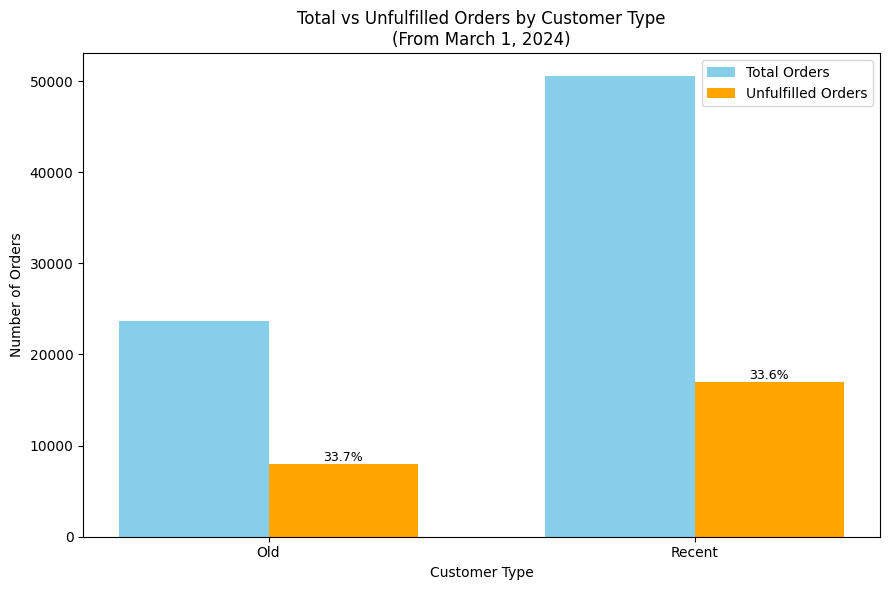

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Define unfulfilled statuses
unfulfilled_statuses = ['Cancelled', 'Returned']

# Ensure datetime columns
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])

# Filter orders from March 1, 2024
df_filtered = df[df['OrderDate'] >= pd.to_datetime('2024-03-01')].copy()

# Mark unfulfilled
df_filtered['IsUnfulfilled'] = df_filtered['OrderStatus'].isin(unfulfilled_statuses)

# Group summary
summary = df_filtered.groupby('CustomerType').agg(
    TotalOrders=('OrderID', 'count'),
    UnfulfilledOrders=('IsUnfulfilled', 'sum')
).reset_index()

summary['UnfulfilledRate'] = (summary['UnfulfilledOrders'] / summary['TotalOrders']) * 100

# Plot side-by-side bars
x = np.arange(len(summary))
width = 0.35

plt.figure(figsize=(9,6))
bar1 = plt.bar(x - width/2, summary['TotalOrders'], width, label='Total Orders', color='skyblue')
bar2 = plt.bar(x + width/2, summary['UnfulfilledOrders'], width, label='Unfulfilled Orders', color='orange')

# Labels on unfulfilled bars
for i in range(len(summary)):
    val = summary.loc[i, 'UnfulfilledOrders']
    pct = summary.loc[i, 'UnfulfilledRate']
    plt.text(x[i] + width/2, val + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

# Axis and legend
plt.xticks(x, summary['CustomerType'])
plt.title('Total vs Unfulfilled Orders by Customer Type\n(From March 1, 2024)')
plt.xlabel('Customer Type')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
unique_customers = df.groupby('CustomerType')['CustomerID'].nunique().reset_index()
unique_customers.columns = ['CustomerType', 'UniqueCustomerCount']
print(unique_customers)


  CustomerType  UniqueCustomerCount
0          Old                 2959
1       Recent                 7100


In [39]:
import statsmodels

In [40]:

from statsmodels.stats.proportion import proportions_ztest

# Define unfulfilled orders
unfulfilled_statuses = ['Cancelled', 'Returned']
df['IsUnfulfilled'] = df['OrderStatus'].isin(unfulfilled_statuses)

# Group by CustomerType
grouped = df.groupby('CustomerType')['IsUnfulfilled'].agg(['sum', 'count']).rename(columns={'sum': 'Unfulfilled', 'count': 'Total'})

grouped




,Unfulfilled,Total
CustomerType,,
Old,8054,23919
Recent,17159,51081


## Hypothesis 1
Null Hypothesis (H₀): Recent customers are not more likely to face fulfillment issues than old customers.

In [41]:
# Extract values
unfulfilled_counts = grouped['Unfulfilled'].values
total_counts = grouped['Total'].values

# Perform one-tailed z-test (alternative: Recent > Old)
z_stat, p_value = proportions_ztest(count=unfulfilled_counts, nobs=total_counts, alternative='larger')

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 0.2167690958477423
P-value: 0.4141941486264027


Null Hypothesis (H₀): Recent customers are not more likely to face fulfillment issues than old customers.

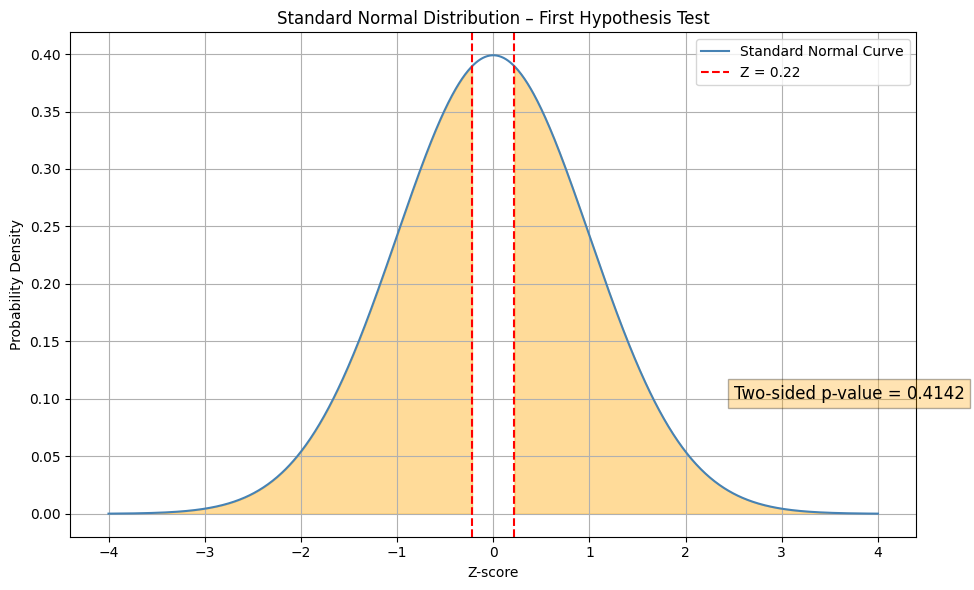

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# First test values
z_stat = 0.2168
p_val = 0.4142  # From your earlier result

# Z-values for normal curve
z = np.linspace(-4, 4, 1000)
pdf = norm.pdf(z)

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(z, pdf, label='Standard Normal Curve', color='steelblue')

# Shade p-value area (two-sided)
plt.fill_between(z, 0, pdf, where=(z >= z_stat), color='orange', alpha=0.4)
plt.fill_between(z, 0, pdf, where=(z <= -z_stat), color='orange', alpha=0.4)

# Add z-score lines
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z = {z_stat:.2f}')
plt.axvline(-z_stat, color='red', linestyle='--')

# Annotate the p-value
plt.text(2.5, 0.1, f'Two-sided p-value = {p_val:.4f}', fontsize=12, color='black', bbox=dict(facecolor='orange', alpha=0.3))

# Final touches
plt.title('Standard Normal Distribution – First Hypothesis Test')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [43]:
# Filter for old customers
old_customers = df[df['CustomerType'] == 'Old']

# Calculate actual unfulfilled rate for old customers
baseline_rate = old_customers['IsUnfulfilled'].mean()
print(f"Baseline unfulfilled rate (old customers): {baseline_rate:.2%}")


Baseline unfulfilled rate (old customers): 33.67%


In [44]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Parameters
baseline_rate = 0.3367  # e.g., unfulfilled rate for old customers
mde = 0.05            # minimum detectable effect (5%)
alpha = 0.05
power = 0.8

# Calculate effect size
effect_size = proportion_effectsize(baseline_rate, baseline_rate + mde)

# Power analysis
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size,
                                   power=power,
                                   alpha=alpha,
                                   ratio=1,
                                   alternative='two-sided')

print(f"Required sample size per group: {int(sample_size)}")



Required sample size per group: 1448


## Hypothesis 2
Null (H₀): Recent customers are just as likely to make a repeat purchase as old customers.

In [45]:
# Count total orders per customer
order_counts = df.groupby('CustomerID').size().reset_index(name='OrderCount')
order_counts

,CustomerID,OrderCount
0,C00001,7376
1,C00002,3662
2,C00003,2523
3,C00004,1854
4,C00005,1443
...,...,...
10054,C15188,1
10055,C15189,1
10056,C15194,1
10057,C15197,1


In [46]:
# Merge back to main df to access CustomerType
order_counts = order_counts.merge(df[['CustomerID', 'CustomerType']].drop_duplicates(), on='CustomerID')
order_counts

# Define repeat purchase flag
order_counts['IsRepeat'] = order_counts['OrderCount'] > 1
order_counts

# Group by customer type
summary = order_counts.groupby('CustomerType').agg(
    TotalCustomers=('CustomerID', 'count'),
    RepeatCustomers=('IsRepeat', 'sum')
).reset_index()

# Extract values
repeat_counts = summary['RepeatCustomers'].values
total_counts = summary['TotalCustomers'].values

# Run one-sided z-test

zstat, pval = proportions_ztest(count=repeat_counts, nobs=total_counts, alternative='smaller')

print(f"Z-statistic: {zstat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistic: -1.0045
P-value: 0.1576


There is no statistically significant evidence that recent customers have a lower repeat purchase rate than old customers.


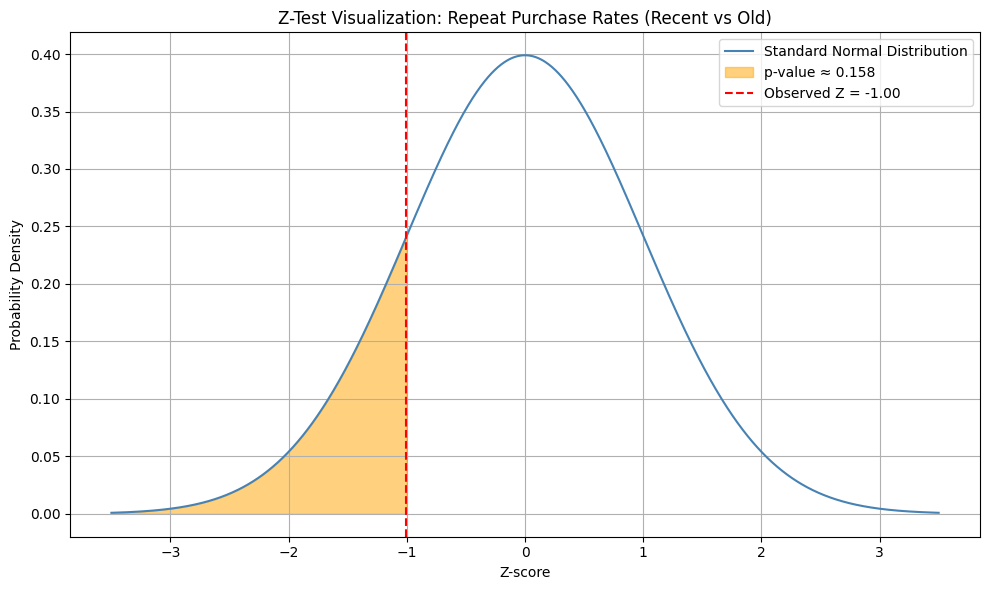

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
z_stat = -1.0045
p_val = 0.1576

# Generate a range of z values
z_vals = np.linspace(-3.5, 3.5, 1000)
pdf_vals = norm.pdf(z_vals)

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Standard Normal Distribution', color='steelblue')

# Fill the rejection region (left tail)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= z_stat), color='orange', alpha=0.5, label=f'p-value ≈ {p_val:.3f}')

# Plot the observed z-statistic
plt.axvline(z_stat, color='red', linestyle='--', label=f'Observed Z = {z_stat:.2f}')

# Add labels and legend
plt.title("Z-Test Visualization: Repeat Purchase Rates (Recent vs Old)")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Problem Statement No.3


In [64]:
import pandas as pd

# 
# Step 1: Load Data
# ---------------------
supplier_df = pd.read_csv('suppliers.csv')
cancel_df = pd.read_csv('TopCancelledProducts.csv').head(20)
product_df = pd.read_csv('products.csv')

# ---------------------
# Step 2: Merge cancel_df with product_df to get SupplierID
# ---------------------
cancel_merged = cancel_df.merge(product_df[['ProductID', 'SupplierID']], on='ProductID', how='left')

# ---------------------
# Step 3: Merge with supplier_df to get SupplierName and Rating
# ---------------------
cancel_merged = cancel_merged.merge(supplier_df[['SupplierID', 'SupplierName', 'SupplierRating']], on='SupplierID', how='left')

# ---------------------
# Step 4: Group by Supplier and Summarize
# ---------------------
summary = cancel_merged.groupby(['SupplierID', 'SupplierName', 'SupplierRating']).agg(
    TotalCancelled=('Total Cancel Count', 'sum'),
    PortHarcourtCancelled=('Port Harcourt', 'sum'),
    ProblematicProducts=('ProductID', 'count')
).reset_index()

# ---------------------
# Step 5: Sort and Display
# ---------------------
summary = summary.sort_values(by='TotalCancelled', ascending=False)
summary


,SupplierID,SupplierName,SupplierRating,TotalCancelled,PortHarcourtCancelled,ProblematicProducts
0,S002,Nguyen-Matthews,Awaiting Rating,7379,4034,3
7,S013,Fitzpatrick Ltd,1,3439,1869,4
5,S009,Bowers and Sons,4-star,2565,1365,2
2,S004,Brown Group,1,2058,1135,2
3,S005,Harrison Inc,2,1953,1075,3
6,S011,Moore Group,5,1736,986,3
4,S007,"Parks, Gomez and Lowery",1,729,406,1
1,S003,Lopez-Jones,4-star,461,229,1


In [78]:
import pandas as pd

# Load data
order_items_df = pd.read_csv('order_items.csv')

# Step 1: Filter to Port Harcourt and surrounding areas
target_cities = ['Port Harcourt', 'Warri', 'Aba', 'Calabar', 'Owerri', 'Uyo']
orders_target = df[df['ShippingCity'].isin(target_cities)]

# Step 2: Merge order_items with orders
merged_df = order_items_df.merge(orders_target[['OrderID', 'OrderStatus', 'ShippingCity']], on='OrderID', how='inner')

# Step 3: Get top 20 cancelled products in target cities
cancelled_df = merged_df[merged_df['OrderStatus'] == 'Cancelled']
top_cancelled = cancelled_df['ProductID'].value_counts().nlargest(20).index.tolist()

# Step 4: Filter data to top 20 products only
relevant_items = merged_df[merged_df['ProductID'].isin(top_cancelled)]

# Step 5: Get cancelled count per ProductID
cancelled_counts = relevant_items[relevant_items['OrderStatus'] == 'Cancelled'] \
    .groupby('ProductID').size().rename('CancelledCount')

# Step 6: Get returned count per ProductID
returned_counts = order_items_df[
    order_items_df['ProductID'].isin(top_cancelled) & order_items_df['ReturnStatus'].notna()
].groupby('ProductID').size().rename('ReturnedCount')

# Step 7: Merge cancel/return stats
product_stats = pd.concat([cancelled_counts, returned_counts], axis=1).fillna(0)
product_stats['Total_Unfulfilled'] = product_stats['CancelledCount'] + product_stats['ReturnedCount']

# Step 8: Map each ProductID to SupplierID
product_supplier = product_df[['ProductID', 'SupplierID']]
product_stats = product_stats.reset_index().merge(product_supplier, on='ProductID', how='left')

# Step 9: Group by SupplierID
supplier_summary = product_stats.groupby('SupplierID').agg({
    'CancelledCount': 'sum',
    'ReturnedCount': 'sum',
    'Total_Unfulfilled': 'sum',
    'ProductID': lambda x: ', '.join(sorted(set(x)))
}).reset_index()

# Step 10: Add supplier name & rating
final = supplier_summary.merge(
    supplier_df[['SupplierID', 'SupplierName', 'SupplierRating']], on='SupplierID', how='left'
)

# Step 11: Rearranging columns
final = final[[
    'SupplierID', 'SupplierName', 'SupplierRating',
    'Total_Unfulfilled', 'CancelledCount', 'ReturnedCount', 'ProductID'
]]
final.rename(columns={'ProductID': 'ProblematicProducts'}, inplace=True)

# Display result
final.sort_values('Total_Unfulfilled', ascending=False).reset_index(drop=True)


,SupplierID,SupplierName,SupplierRating,Total_Unfulfilled,CancelledCount,ReturnedCount,ProblematicProducts
0,S002,Nguyen-Matthews,Awaiting Rating,9338,4400,4938,"P0001, P0002, P0028"
1,S013,Fitzpatrick Ltd,1,4365,2044,2321,"P0004, P0006, P0021, P0025"
2,S009,Bowers and Sons,4-star,3206,1500,1706,"P0003, P0016"
3,S004,Brown Group,1,2664,1247,1417,"P0005, P0014"
4,S005,Harrison Inc,2,2458,1187,1271,"P0009, P0018, P0031"
5,S011,Moore Group,5,2248,1080,1168,"P0017, P0020, P0024"
6,S007,"Parks, Gomez and Lowery",1,940,441,499,P0015
7,S003,Lopez-Jones,4-star,563,252,311,P0027
8,S006,Reyes-Ochoa,NaN,508,255,253,P0033
